<h1 style='color:black;font-size:30px;text-align:center'>Roberts Edge Detection</h1>

Lawrence Roberts has proposed the Roberts edge detection technique for detecting the edges within an image in 1965. It is a simple and computationally efficient approach. It measures the spatial gradient of an image. The pixel value at that point in the resultant image characterizes estimated absolute magnitude value of the spatial gradient of the inputted image at that point. It takes input image as gray scale image and produces edges involving in that image. The main disadvantages of this technique are that it can’t detect that type of edges which are multiplies of 45 degrees and it is not symmetric. The Robert operator contains the pair of 2x2
convolution masks which are in below figure 1. One mask is just to other rotated by 90 degrees.


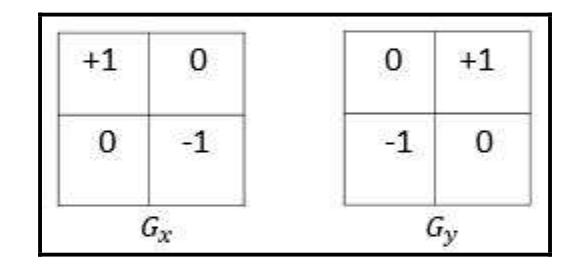


The partial derivates of robert edge detection is as follows:
    
    
 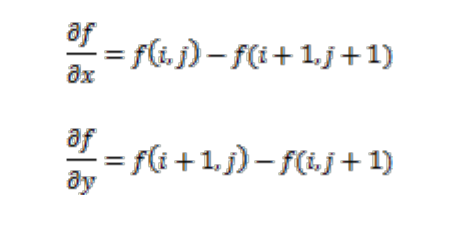

The gradient magnitude and direction can be represented as 
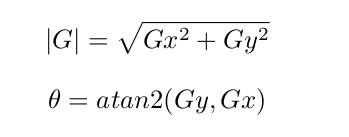


where:
|G| is the gradient magnitude.

θ is the gradient direction.

Gx is the first gradient component.

Gyis the second gradient component.

Additionally, since the gradient magnitude is always positive and its actual magnitude does not affect the algorithm, the gradient magnitude formula can be approximate as

                  |G| = |Gx| + |Gy|

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def convolution2d(image):
   kernel_x=np.array([[1,0],[0,-1]])
   kernel_y=np.array([[0,1],[-1,0]])
   m, n = kernel_x.shape
   x, y = image.shape
   if m==n:
      x = x - m + 1
      y = y - n + 1
      new_image = np.zeros((x,y))
      for i in range(x):
          for j in range(y):
               edge_x= np.sum((image[i:i+m, j:j+n]*kernel_x))
               edge_y= np.sum((image[i:i+m, j:j+n]*kernel_y))
               new_image[i][j]=np.sqrt((np.square(edge_x)+np.square(edge_y)))
#                new_image[i][j]=(np.abs(edge_x)+np.abs(edge_y))
   return new_image



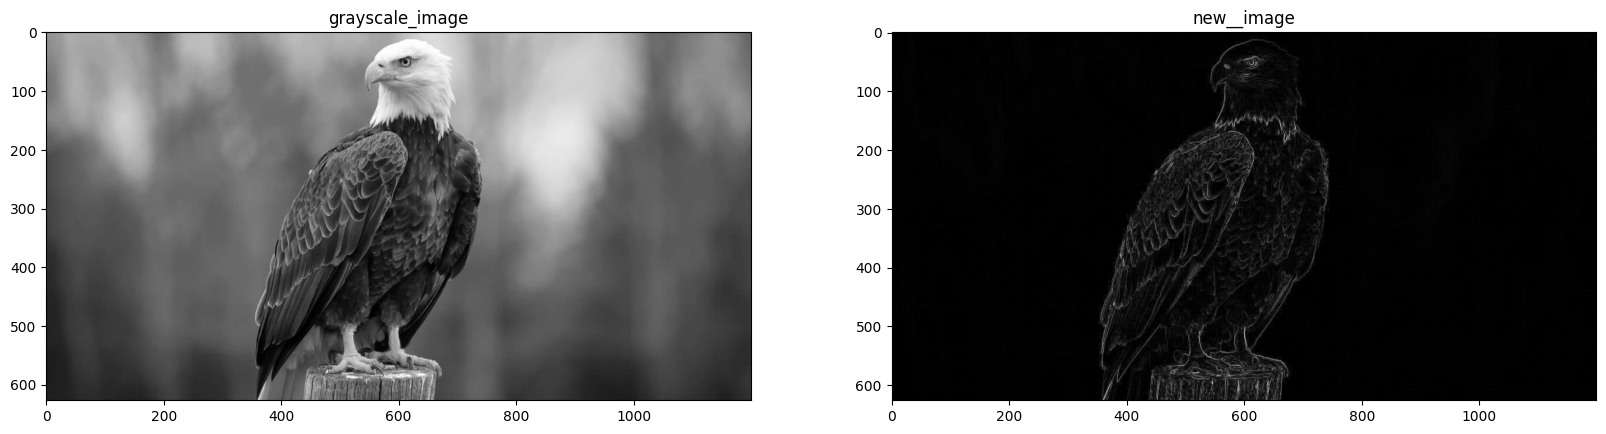

In [5]:
original_image=cv2.imread('eagle.jpg')
grayscale_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
image=cv2.resize(grayscale_image,(600,600))
new_image=convolution2d(grayscale_image)
images=[grayscale_image,new_image]
titles=['grayscale_image','new__image']
plt.figure(figsize=(20,30))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
plt.show()

We can use inbuilt convolve method to perform the robert edge detection which is shown in below

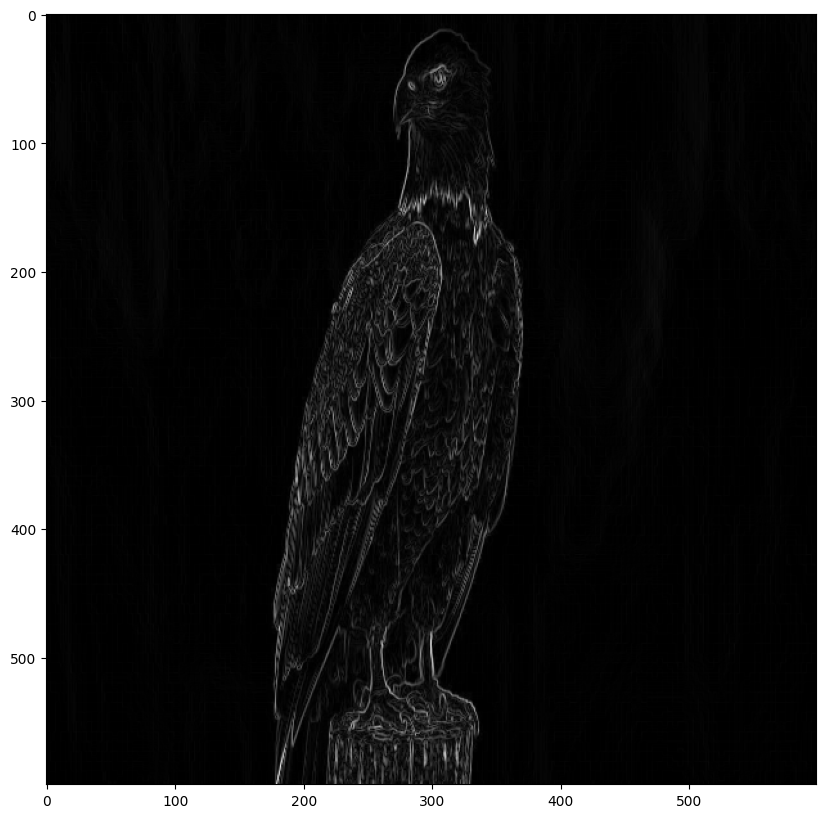

In [6]:
import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("eagle.jpg",0)
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
plt.figure(figsize=(10,10))
plt.imshow(convolution2d(image),cmap='gray')
plt.show()